In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [2]:
# Major Libraries
import scipy
import bottleneck 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Mining / Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

# Supervised Learning
import xgboost as XGB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import yellowbrick as yb
from yellowbrick.classifier import ClassificationReport

from matplotlib import rcParams

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [3]:
cardio = pd.read_csv('../input/cardiovascular-disease-dataset/cardio_train.csv',sep = ';')

In [4]:
type(cardio)

pandas.core.frame.DataFrame

In [5]:
cardio.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
11974,17097,21906,2,152,52.0,130,70,1,1,0,0,1,0
46690,66659,20569,2,175,72.0,120,80,1,3,0,0,1,0
39940,57096,23245,1,155,66.0,140,90,1,1,0,0,1,1
35704,50989,19980,2,167,69.0,110,80,1,1,0,0,1,1
15669,22385,14706,2,187,85.0,120,70,1,1,0,0,1,0


In [6]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
cardio.shape

(70000, 13)

In [9]:
cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
cardio.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [11]:
cardio.drop('id',axis=1, inplace=True)

In [12]:
# cardio['age'] = cardio['age'].map(lambda x : x // 365)

In [13]:
cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [14]:
cardio.shape

(70000, 12)

In [15]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
print(cardio['cardio'].value_counts())

0    35021
1    34979
Name: cardio, dtype: int64


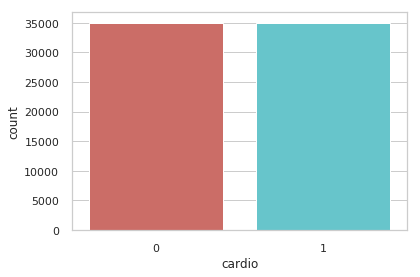

In [17]:
# Exploratory Analysis
cardio.cardio.value_counts()
sns.countplot(x = 'cardio', data = cardio, palette = 'hls')
plt.show()

In [18]:
cardio.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [19]:
corr_matrix = cardio.corr()
corr_matrix["cardio"].sort_values(ascending=False)

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

In [20]:
# Multivariate Analysis
# Correation Matrix:
def plot_corr(df, size=12):
    corr = cardio.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

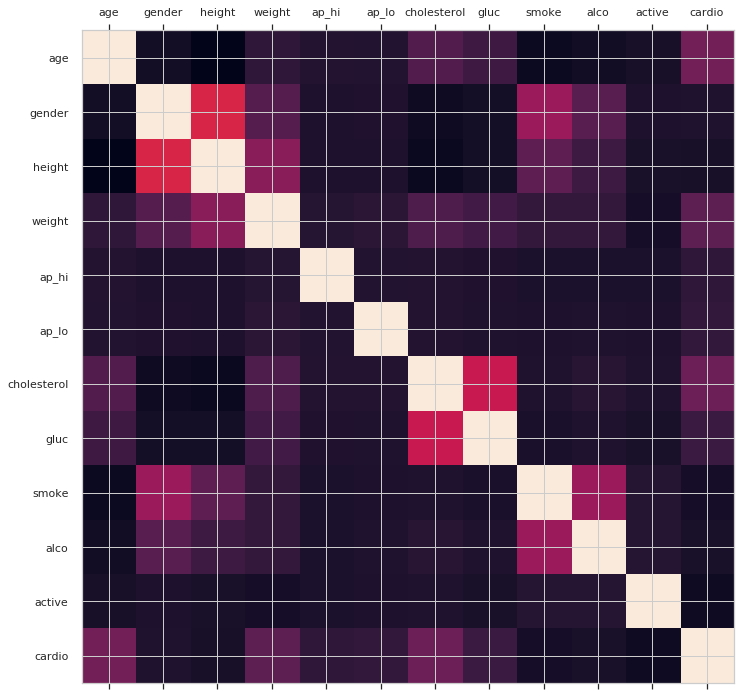

In [21]:
plot_corr(cardio)

<function matplotlib.pyplot.show(*args, **kw)>

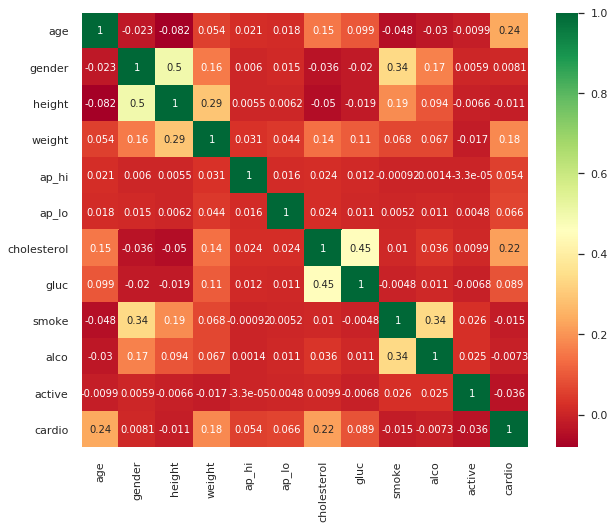

In [22]:
# Drawing the Heatmap
sns.heatmap(cardio.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

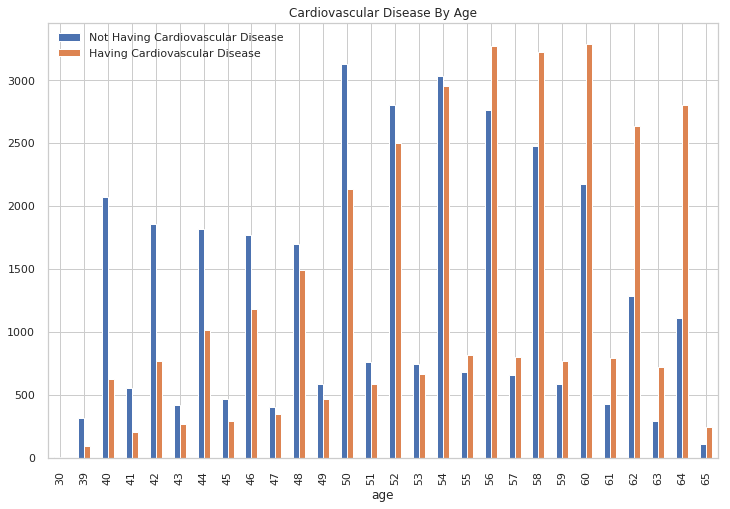

In [23]:
years = (cardio['age'] / 365).round().astype('int')
pd.crosstab(years, cardio.cardio).plot(kind='bar', figsize=(12,8))
plt.title('Cardiovascular Disease By Age')
plt.legend(['Not Having Cardiovascular Disease', 'Having Cardiovascular Disease'])
plt.show()

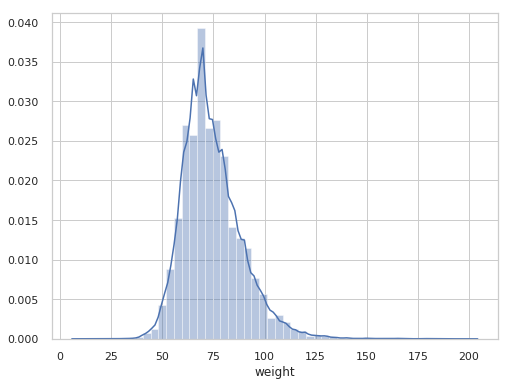

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(cardio['weight'])

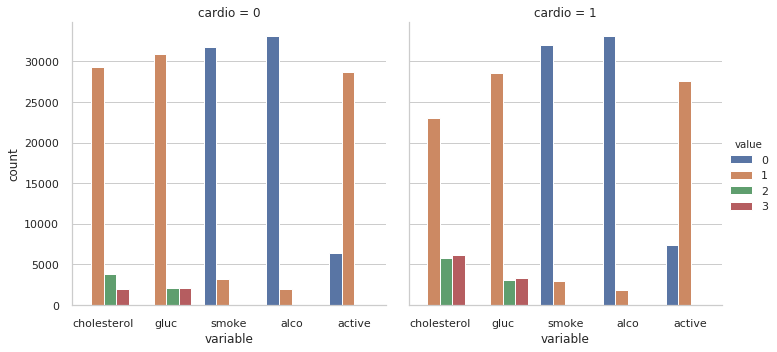

In [25]:
col=['cholesterol','gluc', 'smoke', 'alco', 'active']
data_value=pd.melt(cardio,id_vars="cardio",value_vars=cardio[col])
sns.catplot(x="variable",hue="value",col="cardio",data=data_value,kind="count")

In [26]:
# Predictive Analysis
X = cardio.drop('cardio',axis=1)
y = cardio['cardio']

In [27]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [28]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [29]:
# Feature Scaling
scaler = StandardScaler()

In [30]:
# Scaling the X data
scaler.fit_transform(X)

array([[-0.43606151,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.30768633, -0.73310834, -1.01816804, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.24799666, -0.73310834,  0.07804703, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.16328642,  1.36405487,  2.27047718, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.20058905, -0.73310834, -0.16555632, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.43414373, -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711]])

In [31]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (56000, 11)
X_test:  (14000, 11)
y_train:  (56000,)
y_test:  (14000,)


In [33]:
# Predictive Models
Classifiers = list()

In [34]:
#  Classification Using XGBoost
XGBC = XGB.XGBClassifier()
XGBC.fit(X_train,y_train)
y_pred_XGB = XGBC.predict(X_test)
Classifiers.append(y_pred_XGB)

In [35]:
#  Classification Using Random Forest
RFC = RandomForestClassifier(n_estimators=500,random_state=82)
RFC.fit(X_train,y_train)
y_pred_RF = RFC.predict(X_test)
Classifiers.append(y_pred_RF)

In [36]:
# Classification Using Decision Tree
DTC = DecisionTreeClassifier(max_depth=3, random_state=12, criterion='entropy')
DTC.fit(X_train,y_train)
y_pred_DT = DTC.predict(X_test)
Classifiers.append(y_pred_DT)

In [37]:
#  Classification Using Ada Boost
ABC = AdaBoostClassifier(random_state = 741, n_estimators=70)
ABC.fit(X_train,y_train)
y_pred_AB = ABC.predict(X_test)
Classifiers.append(y_pred_AB)

In [38]:
# Classification Using Gradient Boosting
GB = GradientBoostingClassifier(random_state = 15)
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)
Classifiers.append(y_pred_GB)

In [39]:
#  Classification Using Bagging Classifier
BC = BaggingClassifier(random_state = 222, n_estimators=140)
BC.fit(X_train,y_train)
y_pred_BC = BC.predict(X_test)
Classifiers.append(y_pred_BC)

In [40]:
# Classification Using KNeighbors
KNN = KNeighborsClassifier(n_neighbors = 5, algorithm='brute')
KNN.fit(X_train,y_train)
y_pred_KN = KNN.predict(X_test)
Classifiers.append(y_pred_KN)

In [41]:
#  Classification Using Logistic Regression
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
Classifiers.append(y_pred_LR)

In [42]:
Class = ['XGBoost', 'Random Forest', 'DecisionTree', 'AdaBoost', 'Gradient Boosting', 'Bagging Classifier', 'K Nearest Neighbors', 'Logistic Regression']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(y_test,Classifiers[pred]):
        a = accuracy_score(y_test,Classifiers[pred])
        index=pred
        
    print("Accuracy of {} Classifier is {:.2f}%".format(Class[pred],accuracy_score(y_test,Classifiers[pred])*100))
    
print("\nBest Classifier is {} and The Accuracy is {:.2f}%".format(Class[index],a*100))

Accuracy of XGBoost Classifier is 73.91%
Accuracy of Random Forest Classifier is 71.67%
Accuracy of DecisionTree Classifier is 72.97%
Accuracy of AdaBoost Classifier is 73.56%
Accuracy of Gradient Boosting Classifier is 73.78%
Accuracy of Bagging Classifier Classifier is 71.14%
Accuracy of K Nearest Neighbors Classifier is 68.21%
Accuracy of Logistic Regression Classifier is 69.81%

Best Classifier is XGBoost and The Accuracy is 73.91%


In [46]:
# Classification Report of Best Classifier
print(classification_report(y_test, y_pred_XGB))
print('\n')

print("  Accuracy: ",metrics.accuracy_score(y_test, y_pred_XGB))
print("  Precision: ",metrics.precision_score(y_test, y_pred_XGB))
print("  Recall: ",metrics.recall_score(y_test, y_pred_XGB))
print("  F1 Score: ",metrics.f1_score(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



  Accuracy:  0.7391428571428571
  Precision:  0.7586206896551724
  Recall:  0.7027952082144895
  F1 Score:  0.7296416938110749


In [44]:
# Confusion Matrix of Best Classifier
print(confusion_matrix(y_test, y_pred_XGB))

[[5420 1568]
 [2084 4928]]


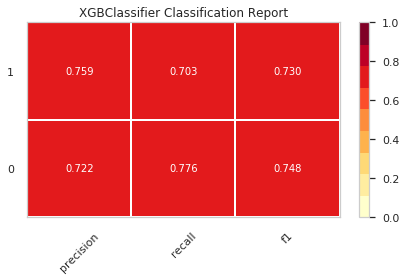

In [45]:
# Visualization of Classification Report of Best Classifier
visualizer = ClassificationReport(XGBC)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()